In [ ]:
!git clone https://github.com/azinghasemi/University.git

Cloning into 'University'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 212.16 KiB | 3.72 MiB/s, done.


### **Task 1 : Data Selection & Exploratory Data Analysis**

In [ ]:
# Librarries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [ ]:
import pandas as pd

# 1) Load the dataset into a DataFrame
df = pd.read_csv('/content/University/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2) Display the dataset's shape (rows, columns) and check the distribution of the target variable 'Churn'
print("Shape:", df.shape)
print("Churn distribution:\n", df['Churn'].value_counts())

# 3) Calculate churn rate as the percentage of customers who have churned
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Churn rate: {churn_rate:.1f}%")


Shape: (7043, 21)
Churn distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn rate: 26.5%


In [ ]:
# Identify and list column names by data type

# Select numeric columns (integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical columns (typically stored as 'object' dtype in pandas)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numeric and categorical columns
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Data Cleaning and Encodeing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv('/content/University/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 1. Convert & Impute TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_tc = df['TotalCharges'].isnull().sum()
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(f" 'TotalCharges' missing values handled: {missing_tc} imputed with median.")

# 2. Preserve 'Churn' and drop 'customerID'
target = df['Churn']
df.drop(['customerID', 'Churn'], axis=1, inplace=True)
print("Dropped 'customerID' column and temporarily removed 'Churn'.")

# 3. One-hot encode low-cardinality categorical variables (≤ 5 unique categories)
cat_cols = df.select_dtypes(include='object').columns.tolist()
low_card_cols = [col for col in cat_cols if df[col].nunique() <= 5]

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = ohe.fit_transform(df[low_card_cols])
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(low_card_cols))

# Drop original categorical columns and combine with numerical + encoded features
df.drop(columns=low_card_cols, inplace=True)
df_encoded = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# 4. Add 'Churn' back to the DataFrame
df_encoded['Churn'] = target.values
print(f" One-hot encoded: {low_card_cols}")
print(f" Final shape after encoding: {df_encoded.shape}")


 'TotalCharges' missing values handled: 11 imputed with median.
Dropped 'customerID' column and temporarily removed 'Churn'.
 One-hot encoded: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
 Final shape after encoding: (7043, 46)


In [ ]:
# Calculate missing rate (%) for each column
missing_rate = df.isnull().sum() / len(df) * 100

# Filter and display only columns with missing values
missing_rate = missing_rate[missing_rate > 0].sort_values(ascending=False)

# Print clean result
print(" Missing Value Rate (%):")
print(missing_rate.round(2))


 Missing Value Rate (%):
Series([], dtype: float64)


In [ ]:
df_encoded.head()
df_encoded.info()
df_encoded.describe()
df_encoded.select_dtypes(include=['int64', 'float64']).describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender_Female                            7043 non-null   float64
 5   gender_Male                              7043 non-null   float64
 6   Partner_No                               7043 non-null   float64
 7   Partner_Yes                              7043 non-null   float64
 8   Dependents_No                            7043 non-null   float64
 9   Dependents_Yes                           7043 non-null   float64
 10  PhoneService_No                          7043 no

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928,0.495244,0.504756,0.516967,0.483033,0.700412,0.299588,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,0.368612,24.559481,30.090047,2265.270398,0.500013,0.500013,0.499748,0.499748,0.458110,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


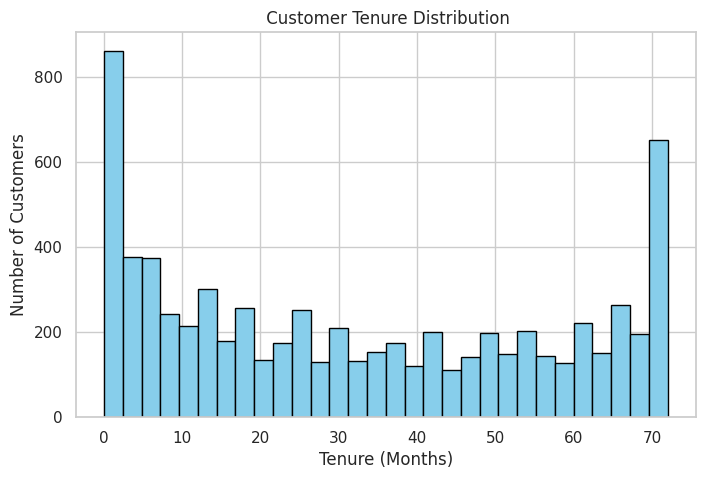

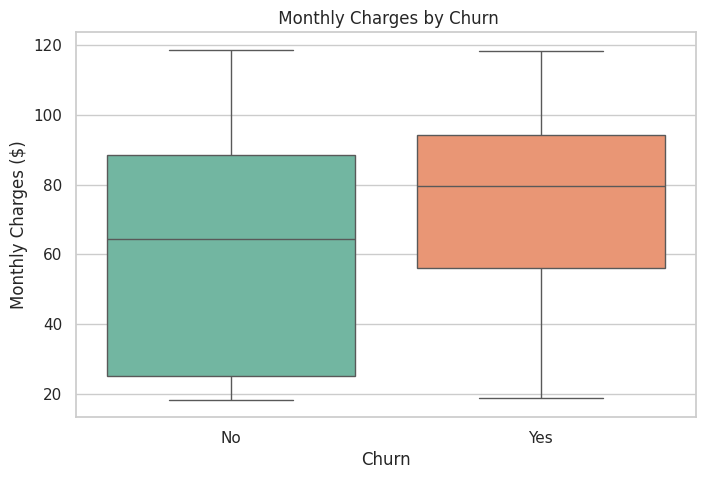

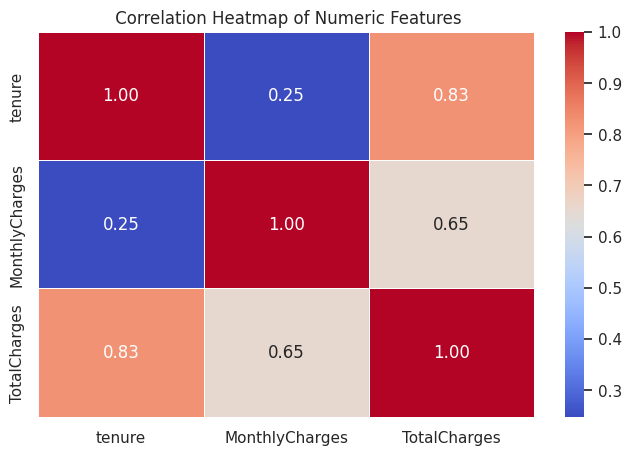

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# 1) Distribution of Customer Tenure
plt.figure()
df_encoded['tenure'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title(' Customer Tenure Distribution')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

# 2) Boxplot of Monthly Charges grouped by Churn
plt.figure()
sns.boxplot(
    x='Churn',
    y='MonthlyCharges',
    hue='Churn',
    data=df_encoded,
    palette={'Yes': '#fc8d62', 'No': '#66c2a5'},
    legend=False
)

plt.title(' Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

# 3) Correlation Heatmap for Numeric Features
plt.figure()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df_encoded[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(' Correlation Heatmap of Numeric Features')
plt.show()


In [ ]:
df_encoded.groupby('Churn')['MonthlyCharges'].agg(['mean', 'std'])

,mean,std
Churn,,
No,61.265124,31.092648
Yes,74.441332,24.666053


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Prepare feature matrix (X) and target vector (y)
# ---------------------------------------------------
# Drop 'Churn' from feature columns
# Convert target 'Churn' to binary: 'Yes' → 1, 'No' → 0
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# 2) Split data into training and testing sets
# --------------------------------------------
# 80% for training, 20% for testing
# stratify=y ensures the same churn ratio in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Preprocessing + Modeling Pipeline
# -------------------------------------
# Identify categorical columns to encode
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Define a column transformer to one-hot encode categorical columns
preproc = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')  # Keep numeric columns unchanged

# Combine preprocessing and classifier in a pipeline
pipeline = Pipeline([
    ('prep', preproc),  # Step 1: apply preprocessing
    ('clf', DecisionTreeClassifier(
        class_weight='balanced',   # handle imbalanced churn classes
        max_depth=5,               # limit tree depth to reduce overfitting
        random_state=42))          # ensure reproducibility
])

# 4) Evaluate model using 5-fold cross-validation
# ------------------------------------------------
# Use F1 score, which balances precision and recall — ideal for imbalanced classification
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

# Print individual fold scores and their mean
print("5-fold F1 scores:", scores)
print("Mean F1:", scores.mean())


5-fold F1 scores: [0.63387978 0.61891892 0.61357702 0.6107056  0.58432935]
Mean F1: 0.6122821338430045


   ### **max_depth=10**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Prepare feature matrix (X) and target vector (y)
# ---------------------------------------------------
# Drop 'Churn' from feature columns
# Convert target 'Churn' to binary: 'Yes' → 1, 'No' → 0
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# 2) Split data into training and testing sets
# --------------------------------------------
# 80% for training, 20% for testing
# stratify=y ensures the same churn ratio in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Preprocessing + Modeling Pipeline
# -------------------------------------
# Identify categorical columns to encode
cat_cols = X.select_dtypes(include='object').columns.tolist()

# Define a column transformer to one-hot encode categorical columns
preproc = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')  # Keep numeric columns unchanged

# Combine preprocessing and classifier in a pipeline
pipeline = Pipeline([
    ('prep', preproc),  # Step 1: apply preprocessing
    ('clf', DecisionTreeClassifier(
        class_weight='balanced',   # handle imbalanced churn classes
        max_depth=5

        ,               # limit tree depth to reduce overfitting
        random_state=42))          # ensure reproducibility
])

# 4) Evaluate model using 5-fold cross-validation
# ------------------------------------------------
# Use F1 score, which balances precision and recall — ideal for imbalanced classification
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')

# Print individual fold scores and their mean
print("5-fold F1 scores:", scores)
print("Mean F1:", scores.mean())


5-fold F1 scores: [0.63387978 0.61891892 0.61357702 0.6107056  0.58432935]
Mean F1: 0.6122821338430045


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Fit the pipeline to the full training data
pipeline.fit(X_train, y_train)

# Predict on the hold-out test set
y_pred = pipeline.predict(X_test)

# Evaluate the predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.76      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.76      0.77      1409

 Confusion Matrix:
[[780 255]
 [ 90 284]]


In [ ]:
import xgboost
print(xgboost.__version__)

2.1.4


In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

# 1) Preprocess data and ensure it's in NumPy format
# ---------------------------------------------------
# Apply preprocessing pipeline (OHE for categorical, passthrough numeric)
X_train_t = preproc.fit_transform(X_train)
X_test_t = preproc.transform(X_test)

# Ensure compatibility: convert sparse matrices (if any) to dense NumPy arrays
X_train_np = X_train_t.toarray() if hasattr(X_train_t, "toarray") else X_train_t
X_test_np = X_test_t.toarray() if hasattr(X_test_t, "toarray") else X_test_t

# 2) Convert datasets to XGBoost's native DMatrix format
# -------------------------------------------------------
# DMatrix is optimized for speed and memory efficiency
dtrain = xgb.DMatrix(X_train_np, label=y_train)
dtest = xgb.DMatrix(X_test_np, label=y_test)

# 3) Define XGBoost parameters
# ------------------------------
# scale_pos_weight compensates for class imbalance (No vs. Yes Churn)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

params = {
    'objective': 'binary:logistic',     # Binary classification with logistic loss
    'eval_metric': 'logloss',           # Evaluation metric for early stopping
    'scale_pos_weight': scale_pos_weight,  # Handle class imbalance
    'max_depth': 4,                     # Limit tree depth to prevent overfitting
    'eta': 0.1,                         # Learning rate (a.k.a. shrinkage)
    'seed': 42                          # Ensure reproducibility
}

# 4) Train model with early stopping
# -----------------------------------
# Stop training if eval logloss doesn't improve for 10 rounds
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,                  # Maximum number of boosting rounds
    evals=[(dtest, 'eval')],              # Validation set for early stopping
    early_stopping_rounds=10,             # Stop if no improvement after 10 rounds
    verbose_eval=False                    # Silence output for cleaner logs
)

# 5) Predict and evaluate performance
# ------------------------------------
# Predict probabilities for test set
y_pred_prob = model.predict(dtest)

# Convert probabilities to class labels using 0.5 threshold
y_pred = (y_pred_prob > 0.5).astype(int)

# Print precision, recall, F1-score, and support per class
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute ROC-AUC to evaluate model's ranking quality
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409

ROC-AUC: 0.8446


[[767 268]
 [ 76 298]]


<Figure size 600x400 with 0 Axes>

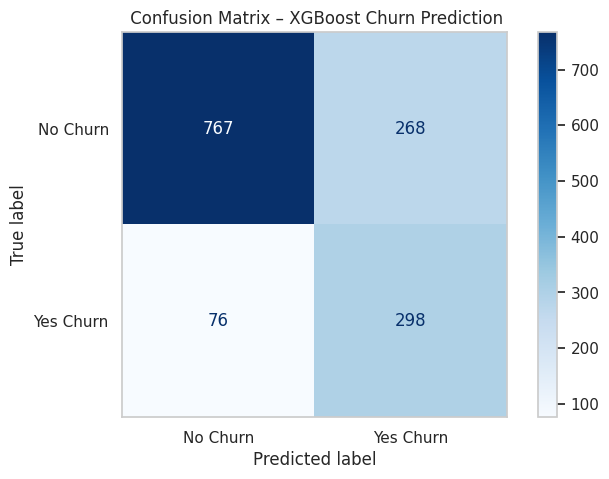

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a labeled display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Yes Churn'])
print(confusion_matrix(y_test, y_pred))


# Plot the matrix with colors and labels
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title(' Confusion Matrix – XGBoost Churn Prediction')
plt.grid(False)
plt.show()


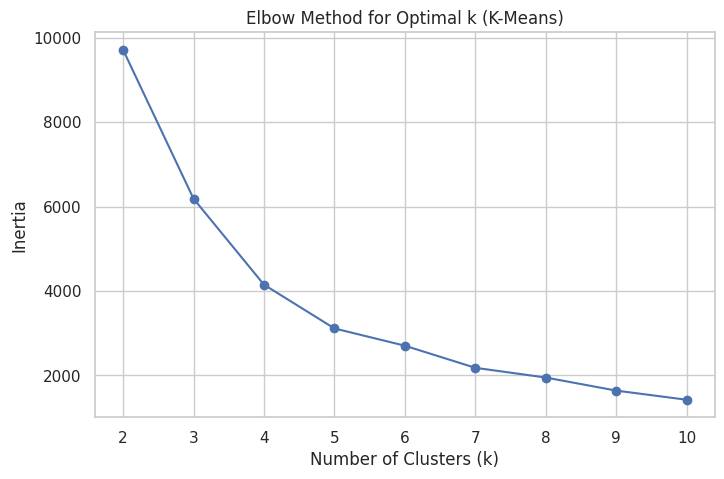

   tenure  MonthlyCharges  TotalCharges  cluster
0       1           29.85         29.85        2
1      34           56.95       1889.50        0
2       2           53.85        108.15        2
3      45           42.30       1840.75        0
4       2           70.70        151.65        3


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1) Select and scale numeric features for clustering
# -----------------------------------------------------
# Focus on key continuous variables related to customer behavior
num_feats = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_num = df_encoded[num_feats]  # Use df_encoded (your cleaned data)

# Standardize features to zero mean and unit variance (important for K-Means)
X_scaled = StandardScaler().fit_transform(X_num)

# 2) Use the Elbow Method to choose optimal number of clusters (k)
# ------------------------------------------------------------------
# We'll try values of k from 2 to 10 and plot the inertia for each
inertias = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)  # Inertia = sum of squared distances to centroids

# Plot the elbow curve
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.grid(True)
plt.show()

# 3) Apply final K-Means clustering with chosen k (e.g., k = 4)
# ---------------------------------------------------------------
# Based on the elbow point, use k=4 to segment customers
km_final = KMeans(n_clusters=4, random_state=42)

# Assign cluster labels to original DataFrame
df_encoded['cluster'] = km_final.fit_predict(X_scaled)

# Optional: preview the result
print(df_encoded[['tenure', 'MonthlyCharges', 'TotalCharges', 'cluster']].head())


In [ ]:
df_encoded.groupby('cluster')['Churn'].value_counts(normalize=True).unstack()


Churn,No,Yes
cluster,,
0,0.949957,0.050043
1,0.846113,0.153887
2,0.753521,0.246479
3,0.517575,0.482425


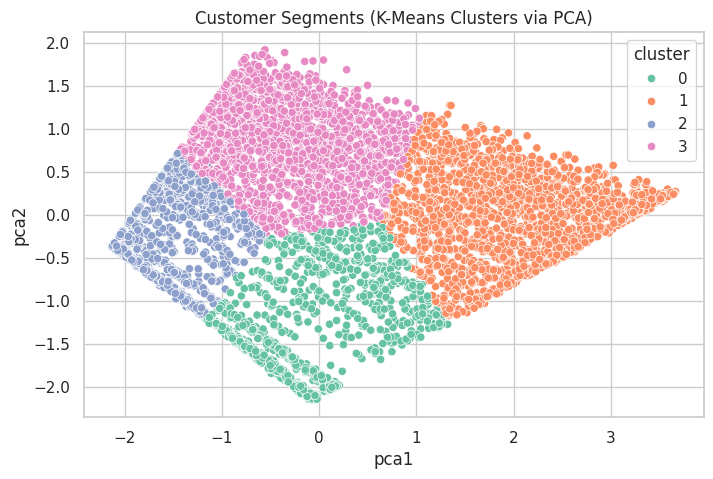

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_encoded['pca1'] = X_pca[:, 0]
df_encoded['pca2'] = X_pca[:, 1]

sns.scatterplot(data=df_encoded, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('Customer Segments (K-Means Clusters via PCA)')
plt.show()


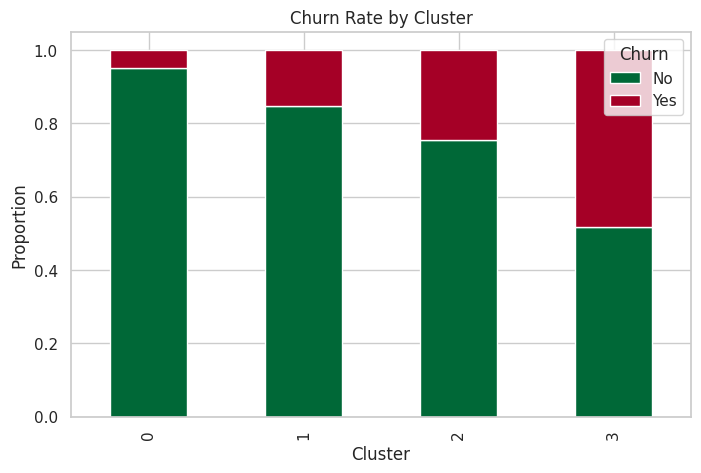

In [ ]:
df_encoded.groupby('cluster')['Churn'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, colormap='RdYlGn_r')
plt.title('Churn Rate by Cluster')
plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.legend(title='Churn')
plt.show()

### **Task 4**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd

# 1.1 Prepare X and y
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'].map({'No': 0, 'Yes': 1})

# 1.2 Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 1.3 Separate categorical and numeric columns
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = [col for col in X.columns if col not in cat_cols]


In [ ]:
# 2.1 Fit OneHotEncoder on training categorical features
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# 2.2 Convert to DataFrames with feature names
X_train_cat_df = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names_out(cat_cols), index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names_out(cat_cols), index=X_test.index)

# 2.3 Combine with numeric features
X_train_final = pd.concat([X_train[num_cols], X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test[num_cols], X_test_cat_df], axis=1)


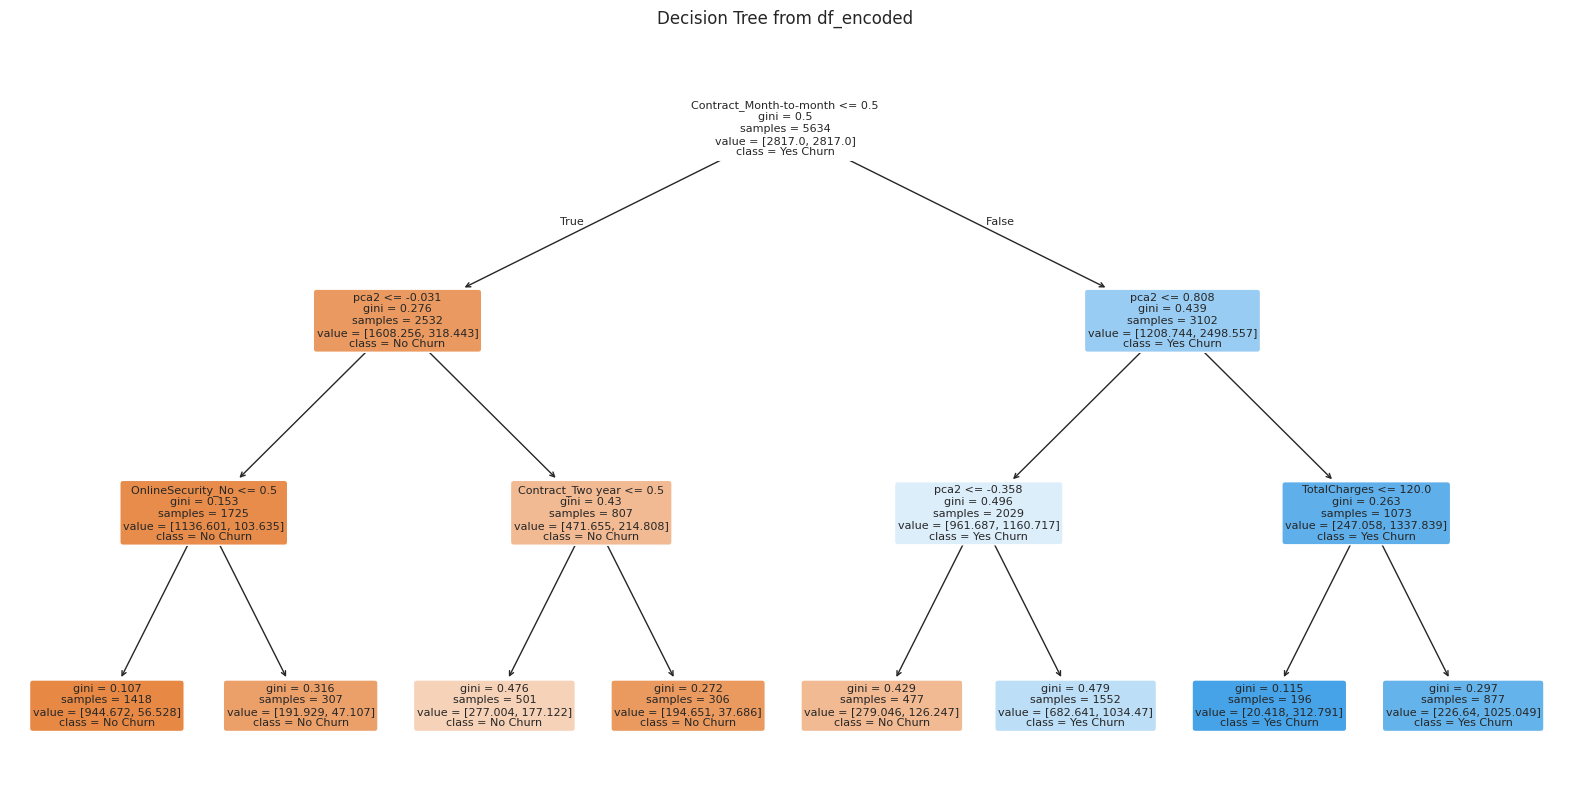

In [ ]:
# 3.1 Train decision tree
clf = DecisionTreeClassifier(max_depth=3, class_weight='balanced', random_state=42)
clf.fit(X_train_final, y_train)

# 3.2 Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    feature_names=X_train_final.columns,
    class_names=['No Churn', 'Yes Churn'],
    filled=True,
    rounded=True
)
plt.title('Decision Tree from df_encoded')
plt.show()
